In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [14]:
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0.0, 1.0, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)
x4 = np.random.uniform(-5, 5, 10000)
samples = [x1, x2, x3, x4]
titles = ["Normal", "Gamma", "Exponential", "Uniform"]

In [23]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


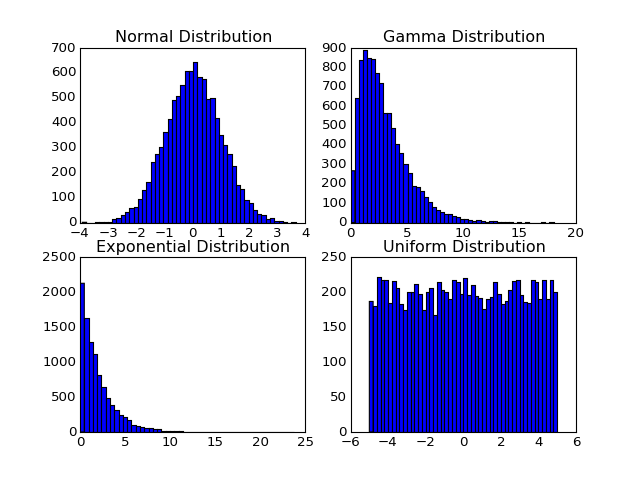

In [22]:
n = 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = [ax1, ax2, ax3, ax4]
for n in range(len(axs)):
    axs[n].hist(samples[n], bins = 50)
    axs[n].set_title("{} Distribution".format(titles[n]))
    axs[n].tick_params(top="off", left="off", right="off", bottom="off")

In [24]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

In [11]:
np.random.seed(12345)
bar1 = np.random.normal(33500, 150000, 3650)
bar2 = np.random.normal(41000, 90000,3650)
bar3 = np.random.normal(41000, 120000,3650)
bar4 = np.random.normal(48000, 55000,3650)
df = pd.DataFrame({1992: bar1, 1993:bar2, 1994: bar3, 1995: bar4})

df.head()

,1992,1993,1994,1995
0,2793.851077,-44406.485331,134288.798913,-44485.202120
1,105341.500709,180815.466879,169097.538334,-156.410517
2,-44415.807259,-108866.427539,337957.368420,-13425.878636
3,-49859.545652,-114625.083717,-76005.273164,53540.999558
4,328367.085875,196807.232582,90130.207911,130408.559874


In [100]:
import scipy.stats as stat

In [126]:
def barplot(df, cutoff, conf = 0.95):
    plt.figure()
    years = np.array(df.columns.values)
    #confidence intervals
    column_std = (df.std().values)/np.sqrt(len(df))*stat.norm.ppf((1 + conf)/2)
    colMeans = df.mean().values #means by column
    barheights = df.mean().values
    bars = plt.bar(years, barheights, yerr = column_std)
    for i in range(len(years)):
        low = colMeans[i] - column_std[i]
        high = colMeans[i] + column_std[i]
        bars[i].set_alpha(0.7)
        if high < cutoff: #if confidence interval high is below cutoff
            bars[i].set_color("blue")
        elif low > cutoff:  #if confidence interval low is above cutoff
            bars[i].set_color("red")
        else:
            #fill alpha based on ratio of confidence interval below cutoff
            bars[i].set_alpha((cutoff - low)/(high - low))
    pos = years + 0.4
    plt.tick_params(top="off", bottom="off", right="off", left="off")
    plt.xticks(pos, years, alpha = 0.8)
    plt.axhline(cutoff, c="r")
    plt.ylim((0, max(colMeans)*1.15))
    plt.xlabel("Year")
    plt.show()

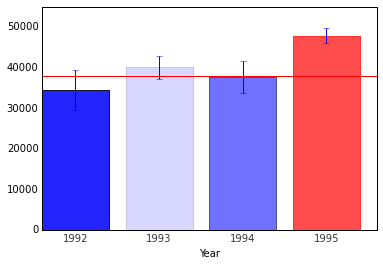

In [127]:
barplot(df, 38000)